In [11]:
from nl2pandas.backend.nli_for_pandas.pipeline import Pipeline
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score
import matplotlib.pyplot as plt
from nl2pandas.backend.nli_for_pandas.data.data import Data

In [12]:
#data = Data(file="./evaluation/small_action_set.csv")
pipeline = Pipeline(data = data)

history = pipeline.train_classifier(epochs=50)

Epoch 1/50
302/302 [==============================] - 0s 1ms/step - loss: 0.3069 - accuracy: 0.8673
Epoch 2/50
302/302 [==============================] - 0s 2ms/step - loss: 0.3069 - accuracy: 0.8688
Epoch 3/50
302/302 [==============================] - 0s 2ms/step - loss: 0.3068 - accuracy: 0.8682
Epoch 4/50
302/302 [==============================] - 0s 2ms/step - loss: 0.3069 - accuracy: 0.8689
Epoch 5/50
302/302 [==============================] - 0s 2ms/step - loss: 0.3068 - accuracy: 0.8681
Epoch 6/50
302/302 [==============================] - 0s 2ms/step - loss: 0.3068 - accuracy: 0.8681
Epoch 7/50
302/302 [==============================] - 0s 2ms/step - loss: 0.3068 - accuracy: 0.8682
Epoch 8/50
302/302 [==============================] - 0s 2ms/step - loss: 0.3069 - accuracy: 0.8689
Epoch 9/50
302/302 [==============================] - 0s 2ms/step - loss: 0.3068 - accuracy: 0.8680
Epoch 10/50
302/302 [==============================] - 0s 2ms/step - loss: 0.3069 - accuracy: 0.8685

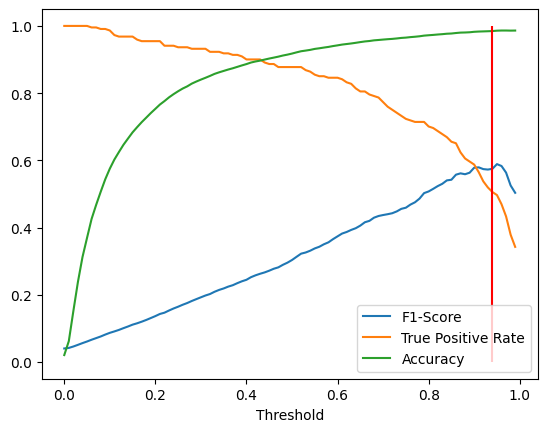

Certainty threshold was set to 0.9400000000000001


0.9400000000000001

In [13]:
pipeline.determine_and_set_certainty_threshold(visualize=True)

In [14]:
similarities, true_values = pipeline.get_similarities_and_true_values(pipeline.data)

# get predictions
predictions = pipeline.classifier.model.predict(np.array(similarities))

# make predictions binary - based on threshold
for threshold in [.1, .2, .3, .4, .5, .6, .7, .8, .9]:
    binary_predictions = [0 if x < threshold else 1 for x in predictions]

    # confusion matrix
    print(f"Threshold: {threshold}")
    print(confusion_matrix(true_values, binary_predictions))
    print()
    print(classification_report(true_values, binary_predictions))
    print()
 

Threshold: 0.1
[[2708 2122]
 [   4  207]]

              precision    recall  f1-score   support

           0       1.00      0.56      0.72      4830
           1       0.09      0.98      0.16       211

    accuracy                           0.58      5041
   macro avg       0.54      0.77      0.44      5041
weighted avg       0.96      0.58      0.69      5041


Threshold: 0.2
[[3470 1360]
 [   8  203]]

              precision    recall  f1-score   support

           0       1.00      0.72      0.84      4830
           1       0.13      0.96      0.23       211

    accuracy                           0.73      5041
   macro avg       0.56      0.84      0.53      5041
weighted avg       0.96      0.73      0.81      5041


Threshold: 0.3
[[3840  990]
 [  16  195]]

              precision    recall  f1-score   support

           0       1.00      0.80      0.88      4830
           1       0.16      0.92      0.28       211

    accuracy                           0.80      50